# TrOCR : 문자 인식 모델

이미지 출력

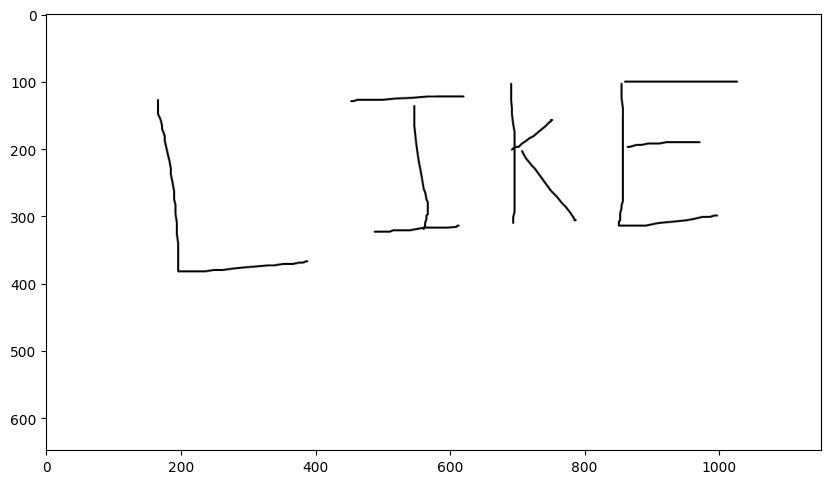

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("/content/test.png") .convert("RGB")
plt.figure(figsize= (10,10))
plt.imshow(image)
plt.axis("on")
plt.show()

TrOCRProcessor : 데이터 전처리 클래스

VisionEncoderDecoderModel : 추론 모델

프로세서 & 모델 세팅

In [4]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

OCR

In [12]:
# Preprocess
pixel_values = processor(images=image, return_tensors="pt").pixel_values
# Inference
token_ids = model.generate(pixel_values)
# Postprocess
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

In [13]:
text_from_image

'L IKE'

# Gradio 사용 프로젝트 개발

In [ ]:
!pip install gradio==3.40.0

Gradio 초기화

In [17]:
import os

import gradio as gr
import numpy as np
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

with gr.Blocks() as app:
    gr.Markdown("# Handwritten Image OCR")
    image = gr.Image(label="Handwritten image file")
    output = gr.Textbox(label="Output Box")
    convert_btn = gr.Button("Convert")

/usr/local/lib/python3.10/dist-packages/gradio_client/documentation.py:106: UserWarning: Could not get documentation group for <class 'gradio.mix.Parallel'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")
/usr/local/lib/python3.10/dist-packages/gradio_client/documentation.py:106: UserWarning: Could not get documentation group for <class 'gradio.mix.Series'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")


Gradio 시작

In [18]:
app.launch(inline=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3f8746d4a2f7b2114f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Gradio 종료

In [19]:
app.close()

Closing server running on port: 7860


TrOCR 클래스화

In [21]:
class TrOCRInferencer:
    def __init__(self):
        print("[INFO] Initialize TrOCR Inferencer.")
        self.processor = TrOCRProcessor.from_pretrained(
            "microsoft/trocr-base-handwritten"
        )
        self.model = VisionEncoderDecoderModel.from_pretrained(
            "microsoft/trocr-base-handwritten"
        )

    def inference(self, image: Image) -> str:
        """Inference using model.

        It is performed as a procedure of preprocessing - inference - postprocessing.
        """
        # preprocess
        pixel_values = self.processor(images=image, return_tensors="pt").pixel_values
        # inference
        generated_ids = self.model.generate(pixel_values)
        # postprocess
        generated_text = self.processor.batch_decode(
            generated_ids, skip_special_tokens=True
        )[0]

        return generated_text

inferencer = TrOCRInferencer()

[INFO] Initialize TrOCR Inferencer.


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


추론 기능 함수화

In [22]:
def image_to_text(image: np.ndarray) -> str:
    image = Image.fromarray(image).convert("RGB")
    text = inferencer.inference(image)
    return text

Gradio와 TrOCR 연결

In [23]:
with gr.Blocks() as app:
    gr.Markdown("# Handwritten Image OCR")
    sketchpad = gr.Sketchpad(
        label="Handwritten Sketchpad",
        shape=(600, 192),
        brush_radius=2,
        invert_colors=False,
    )
    output = gr.Textbox(label="Output Box")
    convert_btn = gr.Button("Convert")
    # TrOCR 기능
    convert_btn.click(
        fn=image_to_text, inputs=sketchpad, outputs=output
    )

app.launch(inline=False, share=True)

IMPORTANT: You are using gradio version 3.40.0, however version 5.0.1 is available, please upgrade.
--------
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b44195fba71483326b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
app.close()